In [1]:
import networkx as nx

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from networkx.algorithms import smallworld

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

In [6]:
v308=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/SOCIAL NETWORK ANALYSIS/project'/V308.xlsx",index_col=0)

In [7]:
v40=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/SOCIAL NETWORK ANALYSIS/project'/V40.xlsx",index_col=0)

In [8]:
v40.shape

(19, 19)

In [9]:
v308


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S
A,0.000000,0.638494,1.030941,0.363883,0.446290,0.409703,0.403956,0.168458,0.269293,0.374905,0.550024,0.242885,0.357112,0.182086,0.377187,0.326224,0.278231,0.190483,0.762362
B,0.638494,0.000000,0.639465,0.620847,0.452921,0.562076,0.380031,0.276640,0.254849,0.487326,0.339085,0.426797,0.322409,0.277349,0.323860,0.505469,0.290852,0.339231,1.512493
C,1.030941,0.639465,0.000000,0.404913,0.541856,0.412099,0.478989,0.156155,0.313513,0.329044,0.584220,0.268274,0.470296,0.150796,0.379393,0.446175,0.368389,0.225428,0.628184
D,0.363883,0.620847,0.404913,0.000000,0.476396,0.873308,0.442590,0.343284,0.315851,0.381915,0.271143,0.630613,0.343874,0.266494,0.323969,0.374578,0.410555,0.495249,0.562982
E,0.446290,0.452921,0.541856,0.476396,0.000000,0.525836,1.261493,0.222477,0.597823,0.296810,0.290912,0.305943,0.556793,0.165203,0.526273,0.253003,0.421071,0.385754,0.462909
F,0.409703,0.562076,0.412099,0.873308,0.525836,0.000000,0.529489,0.614413,0.417654,0.412537,0.304842,0.505185,0.376279,0.298213,0.414318,0.343053,0.360623,0.599788,0.567287
G,0.403956,0.380031,0.478989,0.442590,1.261493,0.529489,0.000000,0.201563,1.019021,0.369901,0.378446,0.332462,0.790993,0.124774,0.614603,0.292080,0.495142,0.461333,0.398646
H,0.168458,0.276640,0.156155,0.343284,0.222477,0.614413,0.201563,0.000000,0.184229,0.222754,0.112215,0.257124,0.138878,0.290129,0.164110,0.195204,0.154517,0.386449,0.275274
I,0.269293,0.254849,0.313513,0.315851,0.597823,0.417654,1.019021,0.184229,0.000000,0.385362,0.378930,0.334223,0.845883,0.114555,0.521835,0.301193,0.482449,0.511152,0.274626
J,0.374905,0.487326,0.329044,0.381915,0.296810,0.412537,0.369901,0.222754,0.385362,0.000000,0.383475,0.535851,0.423598,0.207969,0.382079,0.411569,0.322781,0.348739,0.581336


In [ ]:
v40

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S
A,0.000000,0.222499,0.370338,0.161697,0.146395,0.137849,0.108087,0.132084,0.143192,0.205288,0.306934,0.190471,0.174504,0.141995,0.075661,0.228861,0.149591,0.142988,0.349395
B,0.222499,0.000000,0.268220,0.957834,0.175609,0.507714,0.168996,0.454978,0.214312,0.972455,0.213836,0.992686,0.223906,0.637611,0.099921,0.954844,0.192354,0.449512,0.795509
C,0.370338,0.268220,0.000000,0.202795,0.462144,0.128873,0.112679,0.103868,0.114432,0.205017,0.429549,0.193930,0.286180,0.127359,0.114572,0.337884,0.446281,0.123648,0.213276
D,0.161697,0.957834,0.202795,0.000000,0.227204,0.816826,0.210946,0.574312,0.225066,0.912239,0.179239,1.027904,0.227632,0.887215,0.116788,0.816329,0.266917,0.600508,0.595093
E,0.146395,0.175609,0.462144,0.227204,0.000000,0.163622,0.207393,0.105061,0.116453,0.168565,0.272143,0.166244,0.402730,0.139219,0.224644,0.209391,0.701713,0.162156,0.135231
F,0.137849,0.507714,0.128873,0.816826,0.163622,0.000000,0.277772,0.799997,0.233695,0.566827,0.142793,0.598704,0.180282,0.856388,0.119256,0.513290,0.182211,0.809575,0.445605
G,0.108087,0.168996,0.112679,0.210946,0.207393,0.277772,0.000000,0.240294,0.395202,0.211275,0.106355,0.201586,0.155566,0.204905,0.222998,0.179818,0.206305,0.345866,0.180416
H,0.132084,0.454978,0.103868,0.574312,0.105061,0.799997,0.240294,0.000000,0.251128,0.525618,0.124720,0.527845,0.156450,0.734825,0.114851,0.480346,0.110052,0.763148,0.462036
I,0.143192,0.214312,0.114432,0.225066,0.116453,0.233695,0.395202,0.251128,0.000000,0.271340,0.124257,0.245804,0.150409,0.225227,0.121102,0.237491,0.130294,0.267868,0.250699
J,0.205288,0.972455,0.205017,0.912239,0.168565,0.566827,0.211275,0.525618,0.271340,0.000000,0.229742,1.880322,0.277613,0.864065,0.124736,0.731589,0.193432,0.506345,0.730840


In [10]:
a=[v40,v308]

In [11]:
type(a)

list

In [12]:
dataframe=[]

In [13]:
def small_world_metrics(G, n_iter=100):
    # Calculate the clustering coefficient and average shortest path length of the graph
    C = nx.average_clustering(G)
    L = nx.average_shortest_path_length(G)

    # Generate a random graph with the same number of nodes and edges
    random_graph = nx.gnm_random_graph(len(G.nodes()), len(G.edges()), directed=True)
    Cr = nx.average_clustering(random_graph)
    Lr = nx.average_shortest_path_length(random_graph)

    # Generate a regular lattice graph
    regular_lattice = nx.watts_strogatz_graph(len(G.nodes()), int(np.mean([d for n, d in G.degree()]) // 2) * 2, 0)
    regular_lattice = nx.DiGraph(regular_lattice)
    Cl = nx.average_clustering(regular_lattice)
    Ll = nx.average_shortest_path_length(regular_lattice)

    # Calculate sigma and omega
    sigma = (C / Cr) / (L / Lr)
    omega = (Lr / L) - (C / Cl)

    return sigma, omega
def compute_node_divergence(g1):
      divergence = {}
      for node in g1.nodes():
          neighbors = list(g1.neighbors(node))
          if len(neighbors) == 0:
              divergence[node] = 0
          else:
              degree_node = g1.degree(node, weight='weight')
              avg_degree_neighbors = sum(g1.degree(n, weight='weight') for n in neighbors) / len(neighbors)
              divergence[node] = degree_node - avg_degree_neighbors
      return divergence

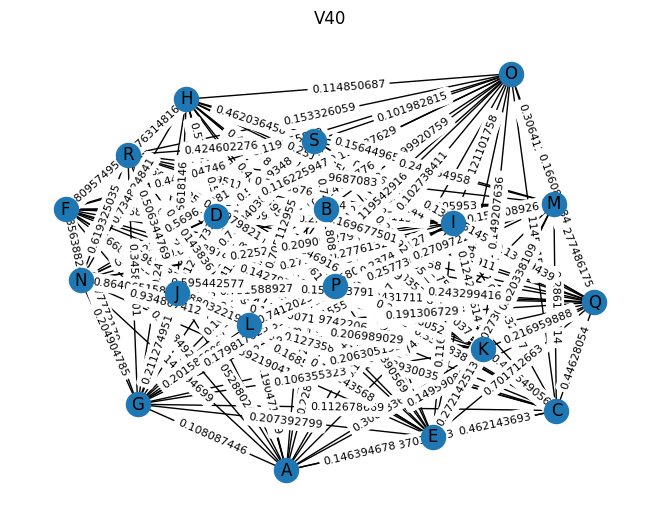

Is the graph complete? True
Sigma (σ): 2.96 for manual
Omega (ω): 0.50 for manual
Sigma (Small-Worldness): 1.0
Omega (Small-Worldness): 0.0
Clustering Coefficient: 0.15875106214356077
Average Shortest Path Length: 0.1950123379590642
Degree Centrality: {'A': 1.0, 'B': 1.0, 'C': 1.0, 'D': 1.0, 'E': 1.0, 'F': 1.0, 'G': 1.0, 'H': 1.0, 'I': 1.0, 'J': 1.0, 'K': 1.0, 'L': 1.0, 'M': 1.0, 'N': 1.0, 'O': 1.0, 'P': 1.0, 'Q': 1.0, 'R': 1.0, 'S': 1.0}
Betweenness Centrality: {'A': 0.013071895424836602, 'B': 0.0, 'C': 0.06535947712418301, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0196078431372549, 'H': 0.05228758169934641, 'I': 0.0, 'J': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'O': 0.3464052287581699, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0}
Closeness Centrality: {'A': 6.335331512848135, 'B': 4.934562108455313, 'C': 5.6877695367428664, 'D': 4.589552048659231, 'E': 5.525222562879034, 'F': 4.955784103274285, 'G': 5.357764791582497, 'H': 5.408523929443676, 'I': 5.270345105965835, 'J': 4.473308602956539,

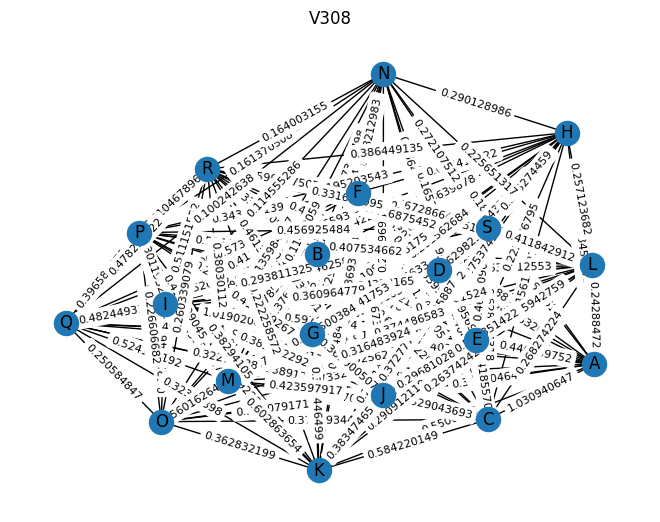

Is the graph complete? True
Sigma (σ): 2.99 for manual
Omega (ω): 0.51 for manual
Sigma (Small-Worldness): 1.0
Omega (Small-Worldness): 0.0
Clustering Coefficient: 0.24639750301458813
Average Shortest Path Length: 0.30789335284210534
Degree Centrality: {'A': 1.0, 'B': 1.0, 'C': 1.0, 'D': 1.0, 'E': 1.0, 'F': 1.0, 'G': 1.0, 'H': 1.0, 'I': 1.0, 'J': 1.0, 'K': 1.0, 'L': 1.0, 'M': 1.0, 'N': 1.0, 'O': 1.0, 'P': 1.0, 'Q': 1.0, 'R': 1.0, 'S': 1.0}
Betweenness Centrality: {'A': 0.0, 'B': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0196078431372549, 'I': 0.006535947712418301, 'J': 0.0, 'K': 0.0196078431372549, 'L': 0.0, 'M': 0.0, 'N': 0.5163398692810458, 'O': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0}
Closeness Centrality: {'A': 3.235019691455231, 'B': 2.532953772199407, 'C': 3.371423535335232, 'D': 2.517694736612805, 'E': 3.165775772339964, 'F': 2.3348223055965853, 'G': 3.4530263246681683, 'H': 4.466145779819706, 'I': 3.809994930515996, 'J': 2.8687425891145155, 'K': 4.121699

In [14]:
for i in range(len(a)):
  title=["V40","V308"]
  g1=nx.from_pandas_adjacency(a[i])
  pos = nx.spring_layout(g1)
  nx.draw(g1,pos,with_labels=True)
  edge_labels = nx.get_edge_attributes(g1, 'weight')
  nx.draw_networkx_edge_labels(g1,pos,edge_labels=edge_labels,font_size=8)
  plt.title(title[i])
  plt.show()
  is_complete = nx.is_connected(g1)
  print(f"Is the graph complete? {is_complete}")
  degree_centrality_g1=nx.degree_centrality(g1)
  closeness_centrality_g1 = nx.closeness_centrality(g1, distance='weight')
  betweenness_centrality_g1 = nx.betweenness_centrality(g1, weight='weight')
  eigenvector_centrality_g1 = nx.eigenvector_centrality_numpy(g1, weight='weight')
  pagerank_g1 = nx.pagerank(g1, weight='weight')
  clustering_coefficient = nx.average_clustering(g1, weight='weight')
  average_shortest_path_length = nx.average_shortest_path_length(g1, weight='weight')
  max_g1egree_centrality_g1=max(degree_centrality_g1,key=degree_centrality_g1.get)
  max_closeness_centrality_g1=max(closeness_centrality_g1,key=closeness_centrality_g1.get)
  max_betweenness_centrality_g1=max(betweenness_centrality_g1,key=betweenness_centrality_g1.get)
  max_eigenvector_centrality_g1=max(eigenvector_centrality_g1,key=eigenvector_centrality_g1.get)
  max_pagerank_g1=max(pagerank_g1,key=pagerank_g1.get)
  sigma, omega = smallworld.sigma(g1, niter=100, nrand=10, seed=None), smallworld.omega(g1)
  assortativity_coefficient_g1 = nx.degree_assortativity_coefficient(g1,weight='weight')
  degree_g1=dict(g1.degree())
  strength_g1 =dict(g1.degree(weight='weight'))
  average_strength = sum(strength_g1.values()) / len(g1.nodes())
  sigma_m, omega_m = small_world_metrics(g1)
  print(f"Sigma (σ): {sigma_m:.2f} for manual")
  print(f"Omega (ω): {omega_m:.2f} for manual")
  node_divergence = compute_node_divergence(g1)
  print("Sigma (Small-Worldness):", sigma)
  print("Omega (Small-Worldness):", omega)
  print("Clustering Coefficient:", clustering_coefficient)
  print("Average Shortest Path Length:", average_shortest_path_length)
  print("Degree Centrality:", degree_centrality_g1)
  print("Betweenness Centrality:", betweenness_centrality_g1)
  print("Closeness Centrality:", closeness_centrality_g1)
  print("Eigenvector Centrality:", eigenvector_centrality_g1)
  print("Pagerank:", pagerank_g1)
  print("the node with maximum degree centrality:",max_g1egree_centrality_g1,degree_centrality_g1[max_g1egree_centrality_g1])
  print("the node with maximum closeeness centrality:",max_closeness_centrality_g1,closeness_centrality_g1[max_closeness_centrality_g1])
  print("the node with maximum betweenness centrality:",max_betweenness_centrality_g1,betweenness_centrality_g1[max_betweenness_centrality_g1])
  print("the node with maximum eigenvector centrality:",max_eigenvector_centrality_g1,eigenvector_centrality_g1[max_eigenvector_centrality_g1])
  print("the node with maximum pagerank:",max_pagerank_g1,pagerank_g1[max_pagerank_g1])
  print("the node with maximum strength:",max(strength_g1,key=strength_g1.get),strength_g1[max(strength_g1,key=strength_g1.get)])
  print("the average strength of the graph is",average_strength)
  print("the assortativity coefficient of the graph is ",assortativity_coefficient_g1)
  for node, div in node_divergence.items():
    print(f"Node {node}: Divergence = {div}")
  print("\n")
  node_metrics = pd.DataFrame({
    'degree centrality':degree_centrality_g1,
    'Clustering Coefficient': clustering_coefficient,
    'Closeness Centrality': closeness_centrality_g1,
    'Betweenness Centrality': betweenness_centrality_g1,
    'Eigenvector Centrality': eigenvector_centrality_g1,
    'Pagerank': pagerank_g1,
    'Degree': degree_g1,
    'Strength':strength_g1
  })
  dataframe.append(node_metrics)


In [15]:
dataframe[0]

,degree centrality,Clustering Coefficient,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,Pagerank,Degree,Strength
A,1.0,0.158751,6.335332,0.013072,0.102029,0.033216,18,3.387828
B,1.0,0.158751,4.934562,0.000000,0.311920,0.069126,18,8.502795
C,1.0,0.158751,5.687770,0.065359,0.115487,0.040244,18,4.241044
D,1.0,0.158751,4.589552,0.000000,0.327384,0.072767,18,9.006543
E,1.0,0.158751,5.525223,0.000000,0.108006,0.040104,18,4.185915
F,1.0,0.158751,4.955784,0.000000,0.267746,0.061936,18,7.481279
G,1.0,0.158751,5.357765,0.019608,0.112542,0.035906,18,3.736457
H,1.0,0.158751,5.408524,0.052288,0.240918,0.055926,18,6.661613
I,1.0,0.158751,5.270345,0.000000,0.118985,0.035432,18,3.717968
J,1.0,0.158751,4.473309,0.000000,0.354995,0.076698,18,9.577309


In [16]:
dataframe[1]

,degree centrality,Clustering Coefficient,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,Pagerank,Degree,Strength
A,1.0,0.246398,3.235020,0.000000,0.237368,0.054215,18,7.372514
B,1.0,0.246398,2.532954,0.000000,0.274990,0.062406,18,8.650194
C,1.0,0.246398,3.371424,0.000000,0.249927,0.057104,18,7.828132
D,1.0,0.246398,2.517695,0.000000,0.247409,0.057837,18,7.902443
E,1.0,0.246398,3.165776,0.000000,0.264130,0.059316,18,8.189763
F,1.0,0.246398,2.334822,0.000000,0.261950,0.061979,18,8.526702
G,1.0,0.246398,3.453026,0.000000,0.284574,0.064316,18,8.975513
H,1.0,0.246398,4.466146,0.019608,0.136914,0.035501,18,4.363872
I,1.0,0.246398,3.809995,0.006536,0.240049,0.055173,18,7.522442
J,1.0,0.246398,2.868743,0.000000,0.215459,0.051175,18,6.857952


In [22]:
G=nx.from_pandas_adjacency(v40)

In [25]:
G=nx.from_pandas_adjacency(v308)

Modularity: -4.440892098500626e-16
Step 1: ({'R', 'G', 'H', 'S', 'C', 'Q', 'K', 'M', 'N', 'D', 'J', 'P', 'L', 'B', 'I', 'O', 'F', 'E', 'A'},)
Step 2: ({'R', 'G', 'H', 'S', 'C', 'Q', 'K', 'M', 'N', 'D', 'J', 'P', 'L', 'B', 'I', 'O', 'F', 'E', 'A'},)


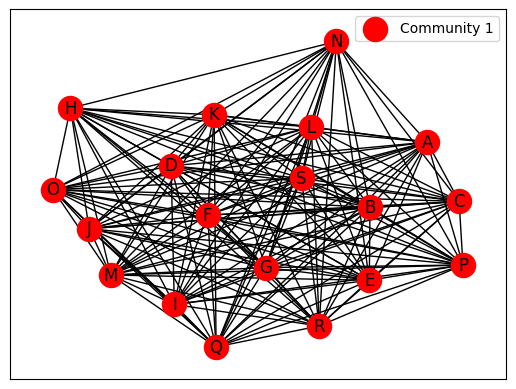

In [26]:
def girvan_newman_communities(G, weight='weight'):
    if G.number_of_edges() == 0:
        yield tuple(nx.connected_components(G))
        return

    def most_central_edge(G):
        centrality = nx.edge_betweenness_centrality(G, weight=weight)
        return max(centrality, key=centrality.get)

    G = G.copy().to_undirected()
    while G.number_of_edges() > 0:
        yield tuple(nx.connected_components(G))
        edge = most_central_edge(G)
        G.remove_edge(*edge)

# Generate communities
communities = girvan_newman_communities(G)


community_list = list(next(communities))

# Calculate modularity
modularity = nx.community.modularity(G, community_list, weight='weight')
print("Modularity:", modularity)

# Find the best partition
# This is a simple approach; more sophisticated methods can be used to find the best split
for idx, community in enumerate(communities):
    print(f"Step {idx + 1}: {community}")
    if idx == 1:  # Stop after first split for simplicity
        break
first_level_communities = next(communities)

# Display the graph with communities
def draw_communities(G, communities):
    pos = nx.spring_layout(G)
    colors = ['r', 'g', 'b', 'y', 'c', 'm']

    for idx, community in enumerate(communities):
        nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=colors[idx % len(colors)], label=f"Community {idx + 1}")
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    plt.legend()
    plt.show()

# Convert community generator to a list of communities
community_list = [list(c) for c in next(communities)]
draw_communities(G, first_level_communities)

In [ ]:
G=g1

In [19]:
!pip install cdlib
from cdlib import algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.6/263.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.2 MB/s eta 0:00:00
Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'infomap', 'graph_tool', 'wurlitzer', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'infomap', 'wurlitzer'}


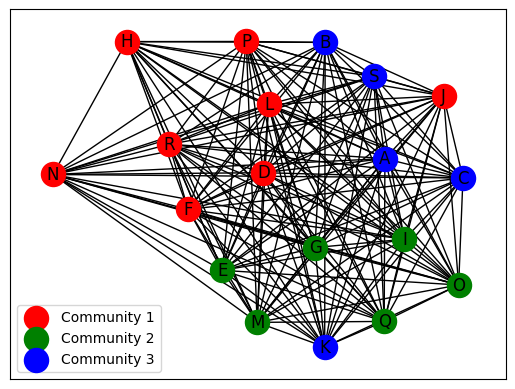

Communities found: [['D', 'F', 'H', 'J', 'L', 'N', 'P', 'R'], ['E', 'G', 'I', 'M', 'O', 'Q'], ['A', 'B', 'C', 'K', 'S']]


In [27]:
partition = algorithms.louvain(G, weight='weight')

# Display the graph with communities
def draw_communities(G, partition):
    pos = nx.spring_layout(G)
    colors = ['r', 'g', 'b', 'y', 'c', 'm']

    for idx, community in enumerate(partition.communities):  # Access communities attribute
        nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=colors[idx % len(colors)], label=f"Community {idx + 1}")
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    plt.legend()
    plt.show()

draw_communities(G, partition)

# Print the communities found
print("Communities found:", partition.communities)  # Access communities attribute

An assortativity coefficient of approximately -0.056 indicates a slight negative assortativity in the graph. Here’s what this means:

	1.	Negative Assortativity: A negative assortativity coefficient suggests that nodes with high degrees (nodes with many connections) are more likely to be connected to nodes with low degrees (nodes with fewer connections). In other words, the graph exhibits a tendency for nodes to connect with nodes that have different degrees.
	2.	Magnitude: The value -0.056 is quite close to zero, indicating that the graph has weak assortative mixing. In general, the closer the assortativity coefficient is to -1, the stronger the disassortative mixing. Since -0.056 is relatively small in magnitude, the negative assortativity is weak.

1.	Sigma (\sigma): This metric compares the clustering coefficient and the average shortest path length of the graph to those of a random graph with the same number of nodes and edges. A value of \sigma > 1 indicates that the graph is more clustered than a random graph and has a comparable average shortest path length, which is characteristic of a small-world network.
2.	Omega (\omega): This metric compares the graph to a regular lattice and a random graph. Values of \omega close to 0 indicate that the graph has properties similar to both regular lattices (high clustering) and random graphs (short average path lengths). Typically, a value of \omega between -0.5 and 0.5 is indicative of a small-world network.

basicall used degree centrality thus degree assortavity

as it is undirected the indegree and out degree are the same for the node in the graph